# Sprint 10: Supervised Learning - Classification
___

### Exercice 1: Create at least three different classification models to try to best predict the flight delay (ArrDelay) from DelayedFlights.csv. Consider whether the flight is late or not (ArrDelay > 0).
### Exercise 2: Compare classification models using accuracy, a confusion matrix, and other more advanced metrics.
### Exercise 3: Train using the different parameters that they support.
### Exercice 4: Compare your performance using the traint/test or cross-validation approach.

___

In [10]:
#Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression #Import Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier #Import KNeighbors Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [11]:
df= pd.read_csv('DelayedFlights.csv', index_col=0)

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [13]:
#Grab only the flights that aren´t cancelled and diverted.

df2 = df[(df['Cancelled']== 0) & (df['Diverted']==0)]


In [14]:
df2.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

we got few values with Nan, that we going to fill with 0 because we want to keep the raws.

In [15]:
#Show my columns:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:
#Dropping some columns that we are not interested to work with.

df2.drop(['Year','Cancelled', 'CancellationCode', 'Diverted', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [17]:
#Fill the Nan values with 0.
df2 = df2.fillna(0)

In [18]:
#Create  new binary column for ArrDelay
def arribos_tardios(x):
    if x > 0:
        return 1
    else: 
        return 0
df2['arribos_tardios'] = df2['ArrDelay'].apply(arribos_tardios)
df2.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,SecurityDelay,arribos_tardios
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0.0,0
1,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0.0,1
2,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0.0,1
4,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0.0,1
5,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0.0,1


In [19]:
#Split dataset in features and target variable.

X = df2.drop(['ArrDelay', 'arribos_tardios'], axis= 1)
y = df2['arribos_tardios']
print(X.shape)
print(y.shape)

(1928371, 12)
(1928371,)


In [20]:
df2['arribos_tardios'].value_counts()

1    1723415
0     204956
Name: arribos_tardios, dtype: int64

In [21]:
X.isnull().sum()

DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
SecurityDelay        0
dtype: int64

Now we have our data clean.

In [22]:
#The categorical variables will not be necessary to predict the arrival delay so we will delete them.

X = X.select_dtypes(include=['float64','int64'])

In [23]:
#Split the Dataset between Train and Test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Model:

In [24]:
# Create Decision Tree classifer object

dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

In [25]:
#Print a dataframe with the predictions:
df_dt=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_dt})
df_dt.head()

,Actual,Predicted
1251307,1,1
4750566,1,1
6773048,1,1
58354,1,1
6648930,1,1


Evaluate the model:

In [26]:
#Let's estimate, how accurately the classifier

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9910978510385264


In [27]:
# f1 score
score_dt = f1_score(y_pred_dt, y_test)
print('El F1 score es:', score_dt)

El F1 score es: 0.9950231928875145


In [28]:
#Generate the confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(cf_matrix_dt)

[[ 58537   2566]
 [  2584 514825]]


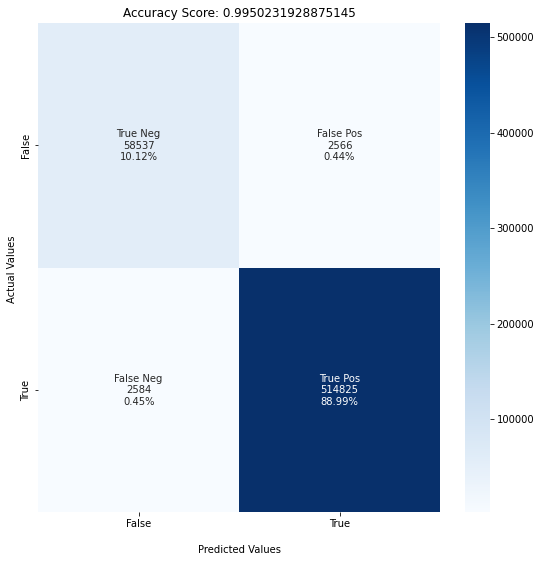

In [29]:
#Plot the confusion matrix:
plt.figure(figsize=(9,9))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_dt.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_dt, annot=labels, fmt='', cmap='Blues')

title = 'Accuracy Score: {0}'.format(score_dt)
ax.set_title(title);


ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The values ​​of the main diagonal 58537 (True Negative) and 514825(True Positive) correspond to the values ​​correctly estimated by the model.

The other diagonal, therefore, represents the cases in which the model was wrong: 2584(False Negative) and 2566 (False Positive).

In [30]:
#Show the Roc Auc Score:
auc_dt = roc_auc_score(y_pred_dt, y_test)
auc_dt

0.9763818530374131

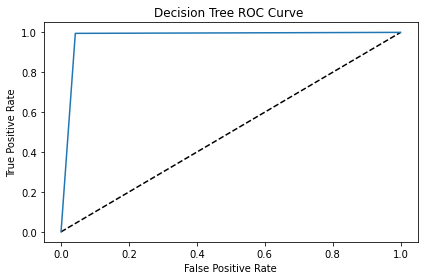

In [31]:
data_dt = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve ')


plt.tight_layout()

plt.show()

The model has a fairly high performance. As the curve moves towards the upper left corner of the graph, the quality of the model increases. This is because the model improves its true positive rate, while also minimizing the false positive rate.

___

Improve the model changing some Hyperparameters:

In [32]:
#Tuning the hyperparameters:

from sklearn.model_selection import GridSearchCV
parametros = {  'random_state': [42],
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None,2, 4]}

gs_dt = GridSearchCV(dt,
                     parametros,
                     scoring='f1')           

gs_dt.fit(X_train, y_train)

y_pred_gs_dt = gs_dt.predict(X_test)

In [33]:
#Show the best params for the model:
gs_dt.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'random_state': 42,
 'splitter': 'best'}

In [34]:
#Show the score of the model:
gs_dt.best_score_

0.9952598464996629

In [35]:
# f1 score
score_gs_dt = f1_score(y_pred_gs_dt, y_test)
print('El F1 score es:', score_gs_dt)

El F1 score es: 0.9957925618988167


In [36]:
#Show the Roc Auc Score:
auc_dt_gs = roc_auc_score(y_pred_gs_dt, y_test)
auc_dt_gs

0.9801352147393396

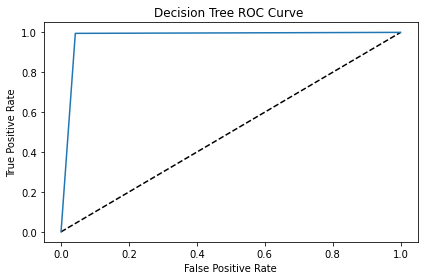

In [37]:

data_dt2 = gs_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve ')


plt.tight_layout()

plt.show()

Again The model has a fairly high performance with similar in comparison with the default parametres.

Cross Validation:

In [38]:
# Compute 5-fold cross-validation scores: dt_cv "Decision Tree Cross Validation"
dt_cv = cross_val_score(dt,X,y,cv=5) 

# Print the 5-fold cross-validation scores
print(dt_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(dt_cv)))

[0.99237182 0.99141244 0.99209436 0.99174173 0.99114019]
Average 5-Fold CV Score: 0.9917521054715561


#### Conlusion:
 After checking the model with cross validation. The Decision Tree proved to be a reliable model for classification, the results that we obtained were very high at the beginning and after the modifications of the hyperparameters it was even better.
___




## Logistic Regression:

In [39]:
#Create an object of the model.
# all parameters not specified are set to their defaults
logistic = LogisticRegression(random_state=42)

#Fit the data
logistic.fit(X_train, y_train)

#Predict the results
logistic_pred = logistic.predict(X_test)

In [40]:
# Use score method to get accuracy of model
logistic_score = logistic.score(X_test, y_test)
print('Score is :', logistic_score)

Score is : 0.9842336891888155


In [41]:
# f1 score
f1_logistic = f1_score(logistic_pred, y_test)
print('El F1 score es:', f1_logistic)

El F1 score es: 0.9912054620434838


In [45]:
#Generate the confusion matrix
cm_logistic = confusion_matrix(y_test, logistic_pred)

print(cm_logistic)

[[ 55391   5712]
 [  3409 514000]]


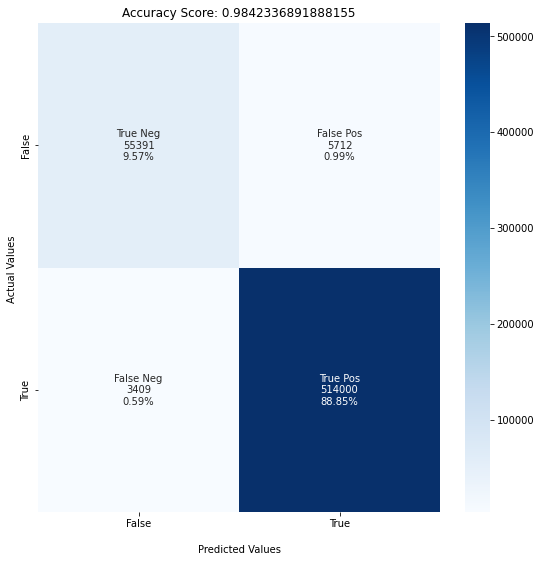

In [46]:
#Plot the confusion matrix:
plt.figure(figsize=(9,9))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic.flatten()/np.sum(cm_logistic)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic, annot=labels, fmt='', cmap='Blues')

title = 'Accuracy Score: {0}'.format(logistic_score)
ax.set_title(title);


ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The values ​​of the main diagonal 55391 (True Negative) and 514000 (True Positive) correspond to the values ​​correctly estimated by the model.

The other diagonal, therefore, represents the cases in which the model was wrong: 3409 (Falso Negativo) and 514000 (False Positive).

In [ ]:
#Show the Roc Auc Score:
auc_logistic = roc_auc_score(logistic_pred, y_test)
print('Roc Auc Score: ', auc_logistic)

Roc Auc Score:  0.9655165534904312


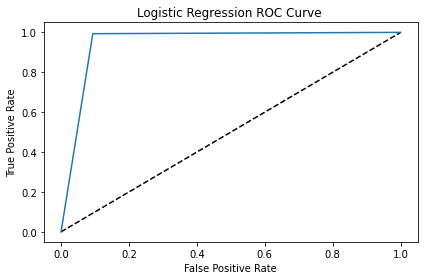

In [ ]:

data_logistic = logistic.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, logistic_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve ')


plt.tight_layout()

plt.show()

We can see that the curve show a high performance, similar like our Decision Tree model coverign a big area.

Improve the model changing some Hyperparameters:

In [ ]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Grid Search
logistic = LogisticRegression()
parametros_log = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,5]}
gs_log = GridSearchCV(logistic, param_grid = parametros_log, scoring = 'recall')
gs_log.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_gs_log = gs_log.predict(X_test)


#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_gs_log)

array([[ 53733,   7370],
       [  6802, 510607]])

In [ ]:
#Show the best params for the model:
best_param_log = gs_log.best_params_
#accuracy of model
logistic_score = gs_log.score(X_test, y_test)
# f1 score
f1_logistic_gs = f1_score(y_pred_gs_log, y_test)
#Show the Roc Auc Score:
auc_logistic_gs = roc_auc_score(y_pred_gs_log, y_test)

print('Los mejores parametros son:', best_param_log)
print('Accuracy Score:', logistic_score)
print('El F1 score es:', f1_logistic_gs)
print('Roc Auc Score: ', auc_logistic_gs)

Los mejores parametros son: {'C': 0.01, 'penalty': 'l2'}
Accuracy Score: 0.9868537269355577
El F1 score es: 0.9863123511424725
Roc Auc Score:  0.9367034106706256


Cross Validation:

In [ ]:
# Compute 5-fold cross-validation scores: dt_cv "Decision Tree Cross Validation"
log_cv = cross_val_score(logistic,X,y,cv=5) 

# Print the 5-fold cross-validation scores
print(log_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(log_cv)))

[0.97667985 0.98451801 0.99176247 0.98788874 0.99026898]
Average 5-Fold CV Score: 0.9862236102615956


#### Conlusion:
Although our model already had good results, by modifying some hyperparameters we could see a very small improvement in our accuracy from 0.984 to 0.986, which is very little, but our F1 and Auc decrease a little compared to our first model. By the way our model is really accurate.
___

## KNeighbors Classifier:

In [43]:
#Create an object of the model.
kn = KNeighborsClassifier()

#Fit the data
kn.fit(X_train, y_train)

#Predict the results
kn_pred = kn.predict(X_test)

In [44]:
# Use score method to get accuracy of model
kn_score = kn.score(X_test, y_test)
print('Kn Score is :', kn_score)

Kn Score is : 0.9517330669026745


In [47]:
# f1 score
f1_kn = f1_score(kn_pred, y_test)
print('El F1 Score es:', f1_kn)

El F1 Score es: 0.9732761269094462


In [48]:
#Generate the confusion matrix
cm_kn = confusion_matrix(y_test, kn_pred)

print(cm_kn)

[[ 42115  18988]
 [  8935 508474]]


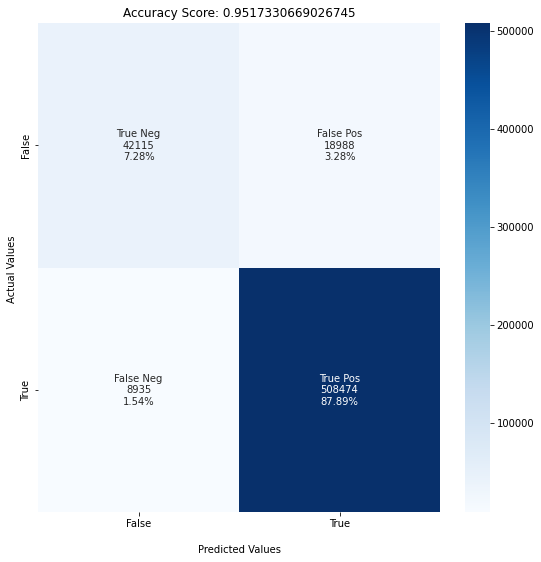

In [49]:
#Plot the confusion matrix:
plt.figure(figsize=(9,9))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_kn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_kn.flatten()/np.sum(cm_kn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_kn, annot=labels, fmt='', cmap='Blues')

title = 'Accuracy Score: {0}'.format(kn_score)
ax.set_title(title);


ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The values ​​of the main diagonal 42115 (True Negative) and 508474 (True Positive) correspond to the values ​​correctly estimated by the model.

The other diagonal, therefore, represents the cases in which the model was wrong: 8935 (False Negative) and 18988 (False Positive).

In [50]:
#Show the Roc Auc Score:
auc_kn = roc_auc_score(kn_pred, y_test)
auc_dt

0.9763818530374131

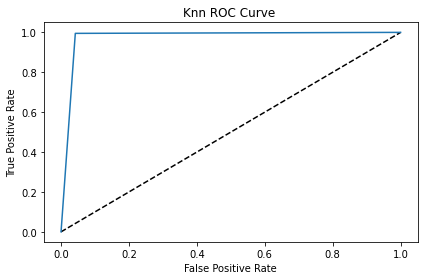

In [63]:
#Plot the Roc Auc Curve:
data_dt = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn ROC Curve ')


plt.tight_layout()

plt.show()

The chart shows our Roc/Auc score 0.976 is really high, because the curve moves towards the upper left corner of the graph.

Improve the model changing some Hyperparameters:

In [56]:
#Tuning the hyperparameters:

from sklearn.model_selection import GridSearchCV
parametros = {  'leaf_size': [2, 3],
                'n_neighbors': [2, 3],
                'p': [1, 2],
                'n_jobs': [-1]}

gs_kn = GridSearchCV(kn, parametros)           

gs_kn.fit(X_train, y_train)

y_pred_gs_kn = gs_kn.predict(X_test)

In [57]:
#Print The value of best Hyperparameters
print('Best leaf_size:', gs_kn.best_estimator_.get_params()['leaf_size'])
print('Best p:', gs_kn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', gs_kn.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 3
Best p: 2
Best n_neighbors: 3


In [58]:
#Show the score of the model:
gs_kn.best_score_

0.949565843562208

In [59]:
# f1 score
score_gs_kn = f1_score(y_pred_gs_kn, y_test)
print('El F1 score es:', score_gs_kn)

El F1 score es: 0.9740871715503601


In [60]:
#Show the Roc Auc Score:
auc_gs_kn = roc_auc_score(y_pred_gs_kn, y_test)
auc_gs_kn

0.8893221362356574

Cross Validation:

In [62]:
# Compute 5-fold cross-validation scores: kn_cv "Knn Cross Validation"
kn_cv = cross_val_score(kn,X,y,cv=5) 

# Print the 5-fold cross-validation scores
print(kn_cv)

print("Average 5-Fold CV Score: {}".format(np.mean(kn_cv)))

[0.94363907 0.94679704 0.94693446 0.94238658 0.9425966 ]
Average 5-Fold CV Score: 0.9444707480208289


#### Conlusion:
In this model we obtained good performance metrics, and we even modified some Hyperparameters to see if we could increase its performance. But the results were a bit below of our default settings.
___

### Final Conclusion:
Among the three models, we obtained very high and precise results, but the one that obtained the best results to predict the Arrival Delay was the Decision Tree, which proved to be fast in processing the data,and modifying some parameters we were able to improve a little bit the Roc/Auc curve.
The percentage of correct predictions over the total after cross validation was 98%.